# **Poisson Regression**: Smoking and Lung Cancer Dataset 🫁

This dataset has information from a Canadian study of mortality by age and smoking status.

# **Feature Selection**

$\qquad$ <span style="color:gray"><b>0.</b> Settings </span><br>
$\qquad$ <span style="color:gray"><b>1.</b> Dataset </span><br>
$\qquad$ <span style="color:gray"><b>2.</b> Data Preprocessing </span><br>
$\qquad$ <span style="color:gray"><b>3.</b> Feature Selection </span><br>

## **0.** Settings

In [1]:
# Libraries
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns 
import pandas as pd  

%matplotlib inline

## **1.** Dataset

In [ ]:
'''
    DATASET INFORMATIONS

    |-------|------------|---------------------------------------------------------------------|
    | Name  | Data Type  | Description                                                         |
    |-------|------------|---------------------------------------------------------------------|
    | age   | continuous | Age at the start of follow-up: in five-year age groups coded 1 to 9 |
    | smoke | nominal    | Smoking: no, cigar_pipe_only, cigarette_plus, cigarette_only        |
    | pop   | nominal    | Population: number of male pensioners followed                      |
    | dead  | nominal    | Number of deaths in a six-year period                               |
    |-------|------------|---------------------------------------------------------------------|
    
'''

In [2]:
# Since the data is in a .dat format (available at: https://data.princeton.edu/wws509/datasets/smoking.dat)

temp = u"""
     age         smoke   pop dead
1  40-44            no   656   18
2  45-59            no   359   22
3  50-54            no   249   19
4  55-59            no   632   55
5  60-64            no  1067  117
6  65-69            no   897  170
7  70-74            no   668  179
8  75-79            no   361  120
9    80+            no   274  120
10 40-44 cigarPipeOnly   145    2
11 45-59 cigarPipeOnly   104    4
12 50-54 cigarPipeOnly    98    3
13 55-59 cigarPipeOnly   372   38
14 60-64 cigarPipeOnly   846  113
15 65-69 cigarPipeOnly   949  173
16 70-74 cigarPipeOnly   824  212
17 75-79 cigarPipeOnly   667  243
18   80+ cigarPipeOnly   537  253
19 40-44 cigarrettePlus 4531  149
20 45-59 cigarrettePlus 3030  169
21 50-54 cigarrettePlus 2267  193
22 55-59 cigarrettePlus 4682  576
23 60-64 cigarrettePlus 6052 1001
24 65-69 cigarrettePlus 3880  901
25 70-74 cigarrettePlus 2033  613
26 75-79 cigarrettePlus  871  337
27   80+ cigarrettePlus  345  189
28 40-44 cigarretteOnly 3410  124
29 45-59 cigarretteOnly 2239  140
30 50-54 cigarretteOnly 1851  187
31 55-59 cigarretteOnly 3270  514
32 60-64 cigarretteOnly 3791  778
33 65-69 cigarretteOnly 2421  689
34 70-74 cigarretteOnly 1195  432
35 75-79 cigarretteOnly  436  214
36   80+ cigarretteOnly  113   63
"""

data = pd.read_fwf(StringIO(temp), usecols = ['age', 'smoke', 'pop', 'dead'])
data.head()

,age,smoke,pop,dead
0,40-44,no,656,18
1,45-59,no,359,22
2,50-54,no,249,19
3,55-59,no,632,55
4,60-64,no,1067,117


In [3]:
data.columns

Index(['age', 'smoke', 'pop', 'dead'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     36 non-null     object
 1   smoke   36 non-null     object
 2   pop     36 non-null     int64 
 3   dead    36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


## **2.** Data Preprocessing

In [5]:
# Null elements
data.isnull().sum()

age      0
smoke    0
pop      0
dead     0
dtype: int64

In [6]:
data.isnull().any()

age      False
smoke    False
pop      False
dead     False
dtype: bool

In [7]:
data.shape

(36, 4)

In [8]:
data.columns

Index(['age', 'smoke', 'pop', 'dead'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     36 non-null     object
 1   smoke   36 non-null     object
 2   pop     36 non-null     int64 
 3   dead    36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [10]:
data.head()

,age,smoke,pop,dead
0,40-44,no,656,18
1,45-59,no,359,22
2,50-54,no,249,19
3,55-59,no,632,55
4,60-64,no,1067,117


In [11]:
# Convert all the categorical data into numerical data
print(data['age'].unique())
print(data['smoke'].unique())

['40-44' '45-59' '50-54' '55-59' '60-64' '65-69' '70-74' '75-79' '80+']
['no' 'cigarPipeOnly' 'cigarrettePlus' 'cigarretteOnly']


In [12]:
# Encode categorical features
labelEncoder_X = LabelEncoder()
data['age']    = labelEncoder_X.fit_transform(data['age'])
data['smoke']  = labelEncoder_X.fit_transform(data['smoke'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     36 non-null     int32
 1   smoke   36 non-null     int32
 2   pop     36 non-null     int64
 3   dead    36 non-null     int64
dtypes: int32(2), int64(2)
memory usage: 992.0 bytes


In [14]:
data.head()

,age,smoke,pop,dead
0,0,3,656,18
1,1,3,359,22
2,2,3,249,19
3,3,3,632,55
4,4,3,1067,117


New encoding:

* `age`

$\qquad\quad$ 0 = 40-44<br>	
$\qquad\quad$ 1 = 45-59<br>	
$\qquad\quad$ 2 = 50-54<br>	
$\qquad\quad$ 3 = 55-59<br>
$\qquad\quad$ 4 = 60-64<br>
$\qquad\quad$ 5 = 65-69<br>	
$\qquad\quad$ 6 = 70-74<br>	
$\qquad\quad$ 7 = 75-79<br>	
$\qquad\quad$ 8 = 80+<br>

* `smoke`

$\qquad\quad$ 3 = no<br>
$\qquad\quad$ 0 = cigarPipeOnly<br>
$\qquad\quad$ 2 = cigarettePlus<br>
$\qquad\quad$ 1 = cigaretteOnly

## **3.** Feature Selection

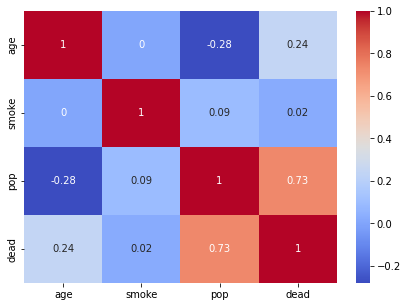

In [15]:
# Correlation matrix
correlation_matrix = data[['age', 'smoke', 'pop', 'dead']].corr().round(2)

plt.figure(figsize=(7,5));
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm');

The correlation coefficient ranges from -1 to 1:
* if the value is close to 1 there is a strong positive correlation between the two variables
* if the value is close to -1, the variables have a strong negative correlation

To fit a linear regression model, we select those features which have a **high correlation** with our target variable.<br>
An important point in selecting features for a linear regression model is to **check for multi-co-linearity**.<br> 

By looking at the correlation matrix, in concordance with what was seen in the EDA, we can see that 'smoke' is not particularly relevant to the prediction of the target variable. We will consider all variables, but their relevance will have to be observed in detail. 